<div style="border:solid green 2px; padding: 20px">
    
<b>Руслан, привет!</b> Мы рады тебя видеть на территории код-ревьюеров 😎. Ты проделал большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать дата-специалистом.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У нас с тобой 6 попыток для сдачи проекта.  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

<div class="alert alert-info"> <b>Комментарии студента:</b> Привет, Александр! Большое спасибо за ревью! </div>

# Исследование данных сервиса Яндекс Афиша

- Автор: Бахтигареев Руслан
- Дата: 02.08.2025
  
## 1. Цели и задачи проекта

**Цель:** - провести анализ данных сервиса продажи билетов на мероприятия Яндекс Афиша с июня по октябрь для выявления изменения пользовательских предпочтений и популярности событий, проверить гипотезу о разнице поведения мобильной и декстопной версий и написать рекоммендации для подготовки к периоду распродаж и новогодних акций

**Задачи:**
1. Загрузить данные  и познакомиться с ними
2. Подготовить данные к исседовательскому анализу, обработать пропуски и дубликаты, привести данные к нужному типу и виду
3. Провести исследовательский анализ
4. Сформулировать итоговый вывод и рекоммендации для заказчика


## 2. Данные 

Данные состоят из трёх датасетов:

- `final_tickets_orders_df.csv` — информация обо всех заказах билетов.
- `final_tickets_events_df.csv` —  информация о событиях, включая город и регион события, а также  о площадке проведения мероприятия.
- `final_tickets_tenge_df.csv` —  информация о курсе тенге к российскому рублю за 2024 год 

### Описание датасета  `final_tickets_orders_df.csv`

- order_id — уникальный идентификатор заказа.
- user_id — уникальный идентификатор пользователя.
- created_dt_msk — дата создания заказа (московское время).
- created_ts_msk — дата и время создания заказа (московское время).
- event_id — идентификатор мероприятия из таблицы events.
- cinema_circuit — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
- age_limit — возрастное ограничение мероприятия.
- currency_code — валюта оплаты, например rub для российских рублей.
- device_type_canonical — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных;
- revenue — выручка от заказа.
- service_name — название билетного оператора.
- tickets_count — количество купленных билетов.
- total — общая сумма заказа.
- days_since_prev - количеством дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.
  
### Описание датасета `final_tickets_events_df.csv`

- event_id — уникальный идентификатор мероприятия.
- event_name — название мероприятия. Аналог поля event_name_code из исходной базы данных.
- event_type_description — описание типа мероприятия.
- event_type_main — основной тип мероприятия: театральная постановка, концерт и так далее.
- organizers — организаторы мероприятия.
- region_name — название региона.
- city_name — название города.
- venue_id — уникальный идентификатор площадки.
- venue_name — название площадки.
- venue_address — адрес площадки.

### Описание датасета `final_tickets_tenge_df.csv` 

- nominal — номинал (100 тенге);
- data — дата;
- curs — курс тенге к рублю;
- cdx — обозначение валюты (kzt).

### Структура проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
 
Хорошее вступление!


## 3. Загрузка данных и знакомство с ними

In [6]:
# Загружаем библиотеку для табличных данных
import pandas as pd
# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
# Загружем библиотеки для статистического анализа
from scipy import stats as st
# Загружаем диаграмму Венна 
!pip install matplotlib-venn -q

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Все необходимые библиотеки стоит выгружать в начале проекта в одной ячейке кода. Чтобы сразу видеть, какие модули используются в проекте

In [8]:
# Выгружаем данные в переменные 
orders_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')
events_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')
tenge_df = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

In [9]:
# Выводим первые строки датафрейма на экран
orders_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [10]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

Датасет `orders_df` содержит 13 столбцов и 290849 строк, в которых представлена информация обо всех заказах билетов.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов корректны, имеют стиль snake case.
- Пропуски содержатся только в столбце `days_since_prev`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.
- **Целочисленные значения (int64).** Столбцы  `order_id`, `event_id`,`event_id`,`age_limit`,`tickets_count` имеют тип данных `int64`. В столбце `tickets_count` можно снизить размерность. Для столбца `age_limit`  лучше подходит `category`
- **Строковые данные (object).** 7 столбцов.
- Столбец `cinema_circuit` представлен текстом. Есть всего две категории - да и нет, лучше подходит тип данных `bool`
- Столбцы `created_dt_msk` и `created_ts_msk`  являются датами. Следует преобразовать их к типу `datetime64`
- Столбцы `currency_code` и `device_type_canonical` можно рассматривать как категориальные признаки, лучше подходит тип `category`
-  **Числовые значения с плавающей запятой (float64).** Столбцы `revenue`, `total`, `days_since_prev` имеют тип данных `float64`. Для столбца `days_since_prev` лучше подходит `int`, поскольку кол-во дней должно быть целым, возможно есть пропуски. 


In [12]:
# Выводим первые строки датафрейма на экран
events_df.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [13]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


Датасет `events_df` содержит 10 столбцов и 22427 строк, в которых представлена информация  о событиях, включая город и регион события, а также  о площадке проведения мероприятия.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов корректны, имеют стиль snake case.
- Пропусков на первый взгляд нет.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.
- **Целочисленные значения (int64).** Столбцы  `city_id  `, `event_id`,`venue_id ` имеют тип данных `int64`. В столбце `city_id` можно снизить размерность. 
- **Строковые данные (object).** 8 столбцов.
- Столбцы `event_type_description` и `event_type_main` можно рассматривать как категориальные признаки, лучше подходит тип `category`


In [15]:
# Выводим первые строки датафрейма на экран
tenge_df.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [16]:
tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


- Похоже, что с данными о курсе тенге всё в порядке

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

По итогу первичного знакомства с данными верно отмечено, что за данные, какого они качества, есть ли пропуски/типы данных, которые нужно скорректировать.

### Подготовка единого датафрейма

In [20]:
print(f'Размер строк таблицы orders_df  {orders_df.shape[0]}')
print(f'Размер строк таблицы events_df  {events_df.shape[0]}')

Размер строк таблицы orders_df  290849
Размер строк таблицы events_df  22427


In [21]:
#Объединяем, чтобы не потерять данные о заказах
df = orders_df.merge(events_df,on = 'event_id', how = 'left')

<div class="alert alert-info"> <b>Комментарии студента:</b> Добавил подсчет строк.</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

    
 Отсутствует проверка размерности строк:
    
* размеры датасетов до объединения
* размер результирующего датафрейма (с учетом типа объединения)

In [24]:
df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290849 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290849 non-null  int64  
 1   user_id                 290849 non-null  object 
 2   created_dt_msk          290849 non-null  object 
 3   created_ts_msk          290849 non-null  object 
 4   event_id                290849 non-null  int64  
 5   cinema_circuit          290849 non-null  object 
 6   age_limit               290849 non-null  int64  
 7   currency_code           290849 non-null  object 
 8   device_type_canonical   290849 non-null  object 
 9   revenue                 290849 non-null  float64
 10  service_name            290849 non-null  object 
 11  tickets_count           290849 non-null  int64  
 12  total                   290849 non-null  float64
 13  days_since_prev         268909 non-null  float64
 14  event_name          

In [26]:
print(f'Размер строк таблицы df после объединения  {df.shape[0]}')

Размер строк таблицы df после объединения  290849


##  4. Предобработка данных

###   Проверяем пропуски 

In [29]:
tmp = df.copy() # Делаем копию текущего датасета
len(tmp)

290849

In [30]:
#Проверяем на пропуски                
missing = (pd.DataFrame({'Кол-во пропусков': tmp.isnull().sum(), 'Доля пропусков': tmp.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
order_id,0,0.000000
user_id,0,0.000000
created_dt_msk,0,0.000000
created_ts_msk,0,0.000000
event_id,0,0.000000
cinema_circuit,0,0.000000
age_limit,0,0.000000
currency_code,0,0.000000
device_type_canonical,0,0.000000
revenue,0,0.000000


- 21940 пропусков в столбце 'days_since_prev' говорят о количестве пользователей, которые совершили покупку впервые
- По 238 пропусков в 7 столбцах, которые были в  таблице events_df говорят о заказах, в которых отсутствуют данные о мероприятии. Кол-во пропусков небольшое, пока оставим как есть

###   Изучаем значения в столбцах 

####    Категориальные данные

In [34]:
#Проверяем категориальные данные
for column in ['cinema_circuit', 'age_limit', 'currency_code','device_type_canonical','service_name','event_name','event_type_description','event_type_main','organizers','city_name','venue_name','venue_address']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце cinema_circuit:
['Другое' 'КиноСити' 'Киномакс' 'Москино' 'ЦентрФильм' 'нет']

Уникальные значения в столбце age_limit:
[ 0  6 12 16 18]

Уникальные значения в столбце currency_code:
['kzt' 'rub']

Уникальные значения в столбце device_type_canonical:
['desktop' 'mobile']

Уникальные значения в столбце service_name:
['Crazy ticket!' 'Show_ticket' 'Билет по телефону' 'Билеты без проблем'
 'Билеты в интернете' 'Билеты в руки' 'Быстробилет' 'Быстрый кассир'
 'Весь в билетах' 'Восьмёрка' 'Вперёд!' 'Выступления.ру'
 'Городской дом культуры' 'Дом культуры' 'Дырокол' 'За билетом!'
 'Зе Бест!' 'КарандашРУ' 'Кино билет' 'Край билетов' 'Лимоны'
 'Лови билет!' 'Лучшие билеты' 'Мир касс' 'Мой билет' 'Облачко'
 'Прачечная' 'Радио ticket' 'Реестр' 'Росбилет' 'Тебе билет!' 'Телебилет'
 'Тех билет' 'Цвет и билет' 'Шоу начинается!' 'Яблоко']

Уникальные значения в столбце event_name:
['000a9c8d-65bb-4178-a5a8-9ddc1f3bf71e'
 '0015b11d-a3e0-4656-887a-383450a9b313'
 '00298e1a-

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Категориальные признаки исследованы на предмет ошибок.

- Все значения выглядят корректными. 

#### Количественные данные revenue

In [38]:
# Исследуем количественные данные выручки в рублях
df_rub = df[(df['currency_code']=='rub')]
df_rub['revenue'].describe()

count    285780.000000
mean        547.568333
std         871.524559
min         -90.760000
25%         113.827500
50%         346.100000
75%         791.700000
max       81174.540000
Name: revenue, dtype: float64

- Отрицательные значения могут быть возратами, поэтому их можно оставить. Максимальное значение в 81 тыс. можно отнести к выбросам. Медиана 346, а среднее значение 548, также std 872, что говорят о выбросах с большими значениями. 

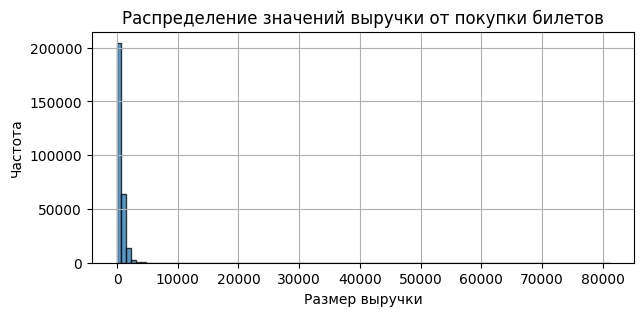

In [40]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_rub['revenue'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=100, # Устанавливаем количество корзин - всего 200
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений выручки от покупки билетов')
plt.xlabel('Размер выручки')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

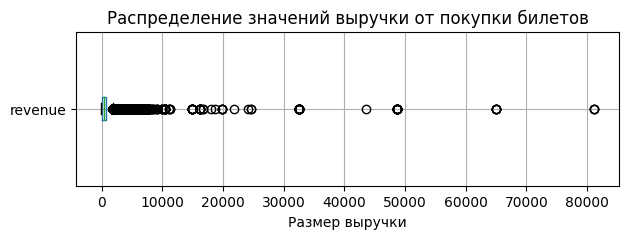

In [41]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df_rub.boxplot(column='revenue', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений выручки от покупки билетов')
plt.xlabel('Размер выручки')

# Выводим график
plt.show()

- В данных тяжёлый правый хвост с множеством выбросов. Следует отфильтровать данные по 99 процентилю

In [43]:
#Убираем значения выше 99 процентиля 
outliers1 = df_rub['revenue'].quantile(0.99)
df_rub = df_rub.loc[df_rub['revenue'] < outliers1]

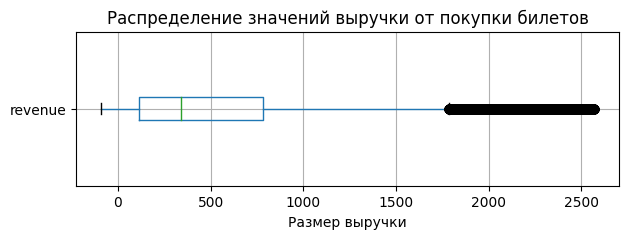

In [45]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df_rub.boxplot(column='revenue', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений выручки от покупки билетов')
plt.xlabel('Размер выручки')

# Выводим график
plt.show()

- Теперь распределение выглядит лучше

In [47]:
# Исследуем количественные данные выручки в тенге
df_kzt = df[(df['currency_code']=='kzt')]
df_kzt['revenue'].describe()

count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      26425.860000
Name: revenue, dtype: float64

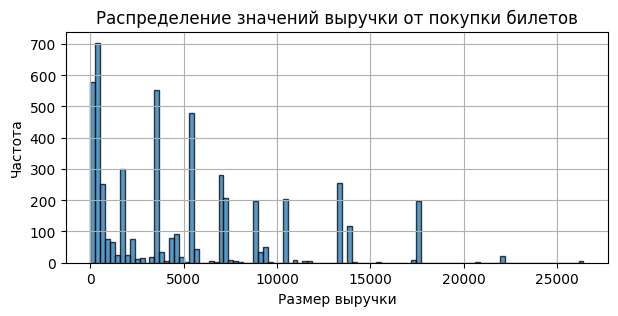

In [48]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_kzt['revenue'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=100, # Устанавливаем количество корзин - всего 200
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений выручки от покупки билетов')
plt.xlabel('Размер выручки')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

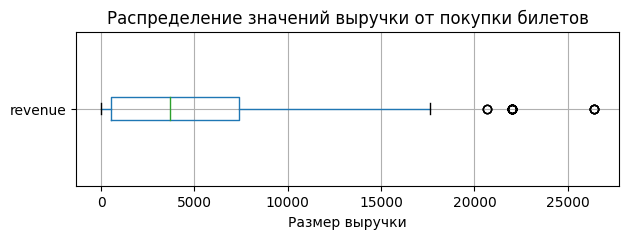

In [49]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df_kzt.boxplot(column='revenue', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений выручки от покупки билетов')
plt.xlabel('Размер выручки')

# Выводим график
plt.show()

- Здесь ситуация выглядит гораздо лучше, меньше выбросов с большими значеними. Можно оставить как есть. 

In [51]:
#Собираем обратно в таблицу
df_filtered  = pd.concat([df_rub, df_kzt])

In [52]:
tmp1 = df_filtered.copy() # Делаем копию текущего датасета
len(tmp1)

287991

#### Количественные данные tickets_count

In [54]:
# Исседуем распределение данных по значениям столбца tickets_count
print('Распределение данных по значениям столбца tickets_count:')
df_filtered['tickets_count'].value_counts()

Распределение данных по значениям столбца tickets_count:


3     91776
2     83740
4     53710
1     41810
5     12861
6      3914
7        58
9        38
10       19
8        18
11       13
13        7
17        6
19        5
14        4
12        3
15        2
27        2
30        2
37        1
47        1
57        1
Name: tickets_count, dtype: int64

In [55]:
df_filtered['tickets_count'].value_counts(normalize=True)

3     0.318677
2     0.290773
4     0.186499
1     0.145178
5     0.044658
6     0.013591
7     0.000201
9     0.000132
10    0.000066
8     0.000063
11    0.000045
13    0.000024
17    0.000021
19    0.000017
14    0.000014
12    0.000010
15    0.000007
27    0.000007
30    0.000007
37    0.000003
47    0.000003
57    0.000003
Name: tickets_count, dtype: float64

In [56]:
print('Статистические показатели столбца tickets_count:')
df_filtered['tickets_count'].describe()

Статистические показатели столбца tickets_count:


count    287991.000000
mean          2.740145
std           1.162530
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          57.000000
Name: tickets_count, dtype: float64

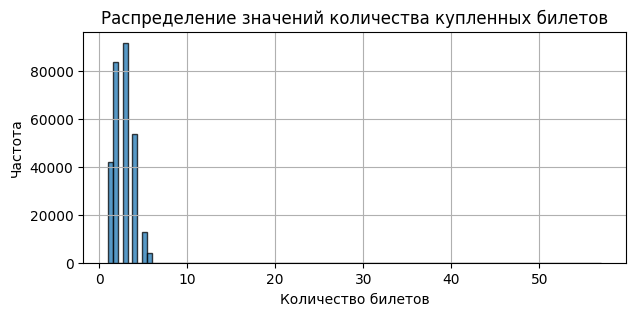

In [57]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_filtered['tickets_count'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=100, # Устанавливаем количество корзин - всего 200
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений количества купленных билетов')
plt.xlabel('Количество билетов')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

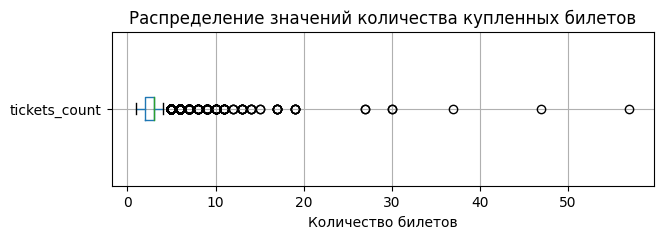

In [58]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df_filtered.boxplot(column='tickets_count', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества купленных билетов')
plt.xlabel('Количество билетов')

# Выводим график
plt.show()

- В данных обнаружено небольшое кол-во выбросов справа. Их можно отнести к естественным выбросам, поскольку можно представить ситуацию, когда образовательная организация или фирма закупает билеты для учащихся или сотрудников
- Медиана 3 и среднее значение 2.74 существенно не отличаются, поэтому оставляем как есть

###   Проверяем дубликаты

In [61]:
# Проверяем явные дубликаты 
df_filtered.duplicated().sum()

0

In [62]:
# Проверяем неявные дубликаты по идентификатору заказа
df_filtered.duplicated(subset='order_id').sum()

0

In [63]:
# Проверяем неявные дубликаты по идентификатору пользователя, времени заказа и выручке
df_filtered.duplicated(subset=['user_id', 'created_ts_msk','revenue']).sum()

50

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отлично, неявные дубликаты найдены

In [65]:
duplicates = df_filtered.duplicated(subset=['user_id', 'created_ts_msk','revenue'], keep=False)

# Выводим строки, которые являются дубликатами
print(df_filtered[duplicates])

        order_id          user_id created_dt_msk       created_ts_msk  \
11777    1123983  06eb7897f65b433     2024-08-13  2024-08-13 16:31:07   
11778    1123867  06eb7897f65b433     2024-08-13  2024-08-13 16:31:07   
12696    5593202  08199117318954f     2024-07-31  2024-07-31 11:52:06   
12697    5592970  08199117318954f     2024-07-31  2024-07-31 11:52:06   
26894    1930705  0dc525d7bacbb0d     2024-07-31  2024-07-31 13:26:11   
...          ...              ...            ...                  ...   
285618   8548070  fd4d47438ebb946     2024-06-19  2024-06-19 15:40:50   
285619   8548099  fd4d47438ebb946     2024-06-19  2024-06-19 15:40:56   
285622   8547867  fd4d47438ebb946     2024-06-19  2024-06-19 15:40:56   
209252   3320153  ae8e3d5af3036a6     2024-07-30  2024-07-30 11:20:46   
209254   3320211  ae8e3d5af3036a6     2024-07-30  2024-07-30 11:20:46   

        event_id cinema_circuit  age_limit currency_code  \
11777     183706            нет         18           rub   
117

In [66]:
#Дубликатов немного, удаляем их
df_filtered = df_filtered.drop_duplicates(subset=['user_id', 'created_ts_msk','revenue'], keep='last')

In [67]:
len(df_filtered)

287941

In [68]:
print(f'Количество строк: {len(tmp)}')
print(f'Количество строк после удаления дубликатов и выбросов: {len(df_filtered)}')
deleted_row_count = len(tmp) - len(df_filtered)
share_deleted_row_count = round((deleted_row_count/len(tmp))*100,2)
print(f'Количество удалённых строк: {deleted_row_count}')
print(f'Доля удалённых строк: {share_deleted_row_count}%')

Количество строк: 290849
Количество строк после удаления дубликатов и выбросов: 287941
Количество удалённых строк: 2908
Доля удалённых строк: 1.0%


###  Преобразования типов данных

In [70]:
# Преобразовываем тип данных столбцов created_dt_msk и created_ts_msk
# к типу datetime64
df_filtered['created_dt_msk'] = pd.to_datetime(df_filtered['created_dt_msk'])
df_filtered['created_ts_msk'] = pd.to_datetime(df_filtered['created_ts_msk'])

In [71]:
# Преобразовываем типы данных с понижением разрядности
for column in ['tickets_count','city_id','age_limit']:
    df_filtered[column] = pd.to_numeric(df_filtered[column], downcast='integer')

In [72]:
# Проверяем результат преобразования
df_filtered[['created_dt_msk','created_ts_msk','tickets_count','city_id','age_limit']].dtypes

created_dt_msk    datetime64[ns]
created_ts_msk    datetime64[ns]
tickets_count               int8
city_id                  float64
age_limit                   int8
dtype: object

 - Типы данных преобразованы, с city_id не получилось, поскольку после объединения датафреймов появились пропуски

In [74]:
tenge_df['data'] = pd.to_datetime(tenge_df['data'])
tenge_df[['data']].dtypes

data    datetime64[ns]
dtype: object

### Создаем  новые столбцы:

In [76]:
def convert_to_rub(row, tenge_df):
    """
 Создаёт новый столбец 'revenue_rub' и переводит значение столбца 'revenue'  в рубли
    """
    if row['currency_code'] == 'rub':
        return row['revenue']  # Если уже в рублях

    elif row['currency_code'] == 'kzt':
        # Находит курс тенге для определённой даты
        exchange_rate = tenge_df[tenge_df['data'] == row['created_dt_msk']]['curs'].iloc[0] if not tenge_df[tenge_df['data'] == row['created_dt_msk']]['curs'].empty else None
        if exchange_rate:
            return row['revenue'] * exchange_rate/100
           
df_filtered['revenue_rub'] = df_filtered.apply(lambda row: convert_to_rub(row, tenge_df), axis=1)

In [77]:
#Проверяем на null новые значения
#df_filtered['revenue_rub'].info()
df_filtered['revenue_rub'].isnull().sum()

0

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

    
К сожалению, некоторые блоки кода не работают. Пожалуйста, проверь корректность проекта перед отправкой. Это можно реализовать с помощью Kernell-Restart and Run all (на платформе ЯП)

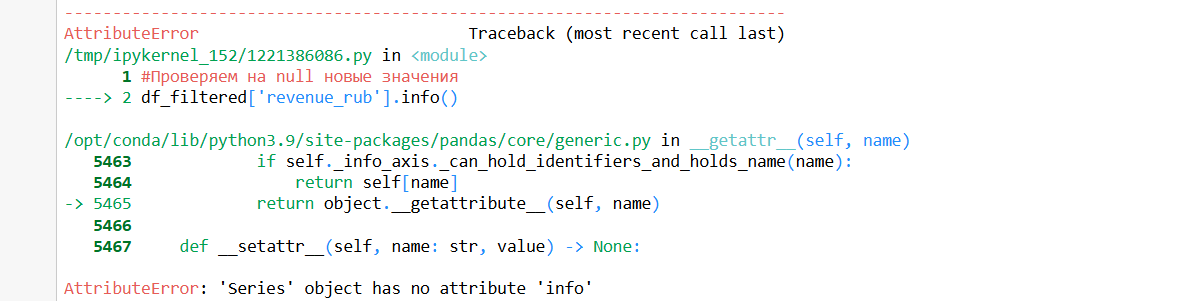

In [79]:
#Проверяем получившиеся значения для kzt
df_filtered[df_filtered['currency_code'] == 'kzt'][['revenue', 'currency_code', 'revenue_rub']].head()

,revenue,currency_code,revenue_rub
73,518.10,kzt,98.503762
92,347.18,kzt,65.731589
99,328.77,kzt,61.148261
289,22021.55,kzt,4380.702898
472,7397.66,kzt,1478.296591


In [80]:
#Проверяем получившиеся значения для rub
df_filtered[df_filtered['currency_code'] == 'rub'][['revenue', 'currency_code', 'revenue_rub']].head()

,revenue,currency_code,revenue_rub
0,1521.94,rub,1521.94
1,289.45,rub,289.45
2,1258.57,rub,1258.57
3,8.49,rub,8.49
4,1390.41,rub,1390.41


In [81]:
# Создаём столбец с выручкой с продажи одного билета на мероприятие.
df_filtered['one_ticket_revenue_rub'] = round(df_filtered['revenue_rub']/df_filtered['tickets_count'],2)

In [82]:
df_filtered[['revenue_rub','tickets_count','one_ticket_revenue_rub']].head() 

,revenue_rub,tickets_count,one_ticket_revenue_rub
0,1521.94,4,380.48
1,289.45,2,144.72
2,1258.57,4,314.64
3,8.49,2,4.24
4,1390.41,3,463.47


In [83]:
# Выделяем месяц оформления заказа в отдельный столбец.
df_filtered['month'] = df_filtered['created_dt_msk'].dt.month
df_filtered[['created_dt_msk','month']].head() 

,created_dt_msk,month
0,2024-08-20,8
1,2024-07-23,7
2,2024-10-06,10
3,2024-07-13,7
4,2024-10-04,10


In [84]:
df_filtered['month'].value_counts()

10    99268
9     69331
8     44569
7     40402
6     34371
Name: month, dtype: int64

In [85]:
df_filtered['season'] = pd.cut(df_filtered['month'],
                               bins=[6,8,11], 
                               labels=[ "лето", "осень"], 
                               include_lowest=True,
                               right=True 
                               ) 
df_filtered[['season','month']].head(10)

,season,month
0,лето,8
1,лето,7
2,осень,10
3,лето,7
4,осень,10
5,осень,10
6,лето,8
7,осень,9
8,осень,10
9,лето,6


In [86]:
df_filtered['season'].value_counts()

осень    168599
лето     119342
Name: season, dtype: int64

### Промежуточный вывод

В результате предобработки данных были выполнены следующие действия:

- Изучены пропуски. Пропуски обнаружились в столбцах, которые соответствовали events_df - 238 пропусков, менее 0.1%. Также 8% пропусков в столбце days_since_prev, что говорит о кол-ве заказов, которые были сделаны пользователями впервые. Пропуски оставили как есть.
- Изучили  категориальные значения. Они выглядят корректными.
- Изучили числовые значения. Распределение значений revenue в рублях имело тяжёлый правый хвост с множеством выбросов.Офильтровали данные по 99 процентилю. Удалено 2858 строк. Распределение значений revenue в тенге имели лучший вид, их оставили как есть.
- Проверили на явные и неявные дупликаты. Обнаружено 50 строк с неявными дубликатами по столбцам 'user_id', 'created_ts_msk','revenue'
- Всего удалённых строк: 2908. Доля удалённых строк: 1.0%
- Преобразовали стобцы 'created_dt_msk','created_ts_msk'и 'data' (таблица курса тенге) к типу datetime64
- Понизили разрядность данных в целочисленных столбцах 'tickets_count','age_limit' 
- Создали новые столбцы: 'revenue_rub' в котором выручка переведена в рубли, 'one_ticket_revenue_rub' с выручкой с продажи одного билета на мероприятие, 'month' месяц оформления заказа, 'season' сезон "зима", "весна", "лето", "осень".



<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верное решение по результатам обработки сделать вывод об основных изменениях, а также посчитать потери данных.

## 5. Исследовательский анализ данных

### 5.1. Анализ распределения заказов по сегментам и их сезонные изменения

#### Количество заказов в месяц

In [93]:
df_filtered['month'].value_counts()

10    99268
9     69331
8     44569
7     40402
6     34371
Name: month, dtype: int64

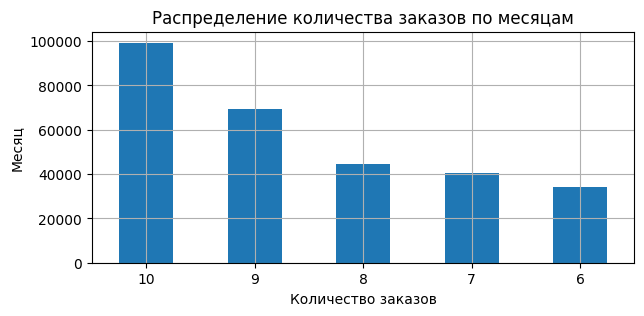

In [94]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим линейчатую диаграмму с помощью pandas через plot(kind='bar')
df_filtered['month'].value_counts().plot(
               kind='bar', # Тип графика - линейчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества заказов по месяцам'
)

# Настраиваем оформление графика
plt.xlabel('Количество заказов')
plt.ylabel('Месяц')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

 - Фиксируем увеличение заказов от июня (34 тыс.) к ноябрю (99 тыс.) 2024 года.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Правильно, что не отображаешь месяцы без заказов

#### Сравнение распределения заказов билетов  для лета и осени по разным категориям

#### По типам мероприятий

In [99]:
# Группируем данные и считаем показатели по типам мероприятий
df_grouped = df_filtered.groupby('event_type_main')['season'].value_counts().unstack(fill_value=0)
df_grouped


season,лето,осень
event_type_main,,
выставки,2416,2436
другое,32359,33225
концерты,50784,62690
спорт,3006,18879
стендап,6346,6923
театр,23942,42733
ёлки,273,1691


In [100]:
# Считаем общее количество мероприятий по сезонам
season_totals = df_filtered['season'].value_counts()

# Группируем по типу мероприятия и сезону, считаем абсолютные количества
df_counts = df_filtered.groupby(['event_type_main', 'season'],observed=False).size().unstack(fill_value=0)

# Вычисляем доли каждого типа мероприятий в каждом сезоне
df_share_by_season = df_counts.div(season_totals, axis=1)

# Результат
df_share_by_season


,лето,осень
event_type_main,,
выставки,0.020244,0.014448
другое,0.271145,0.197065
концерты,0.425533,0.371829
спорт,0.025188,0.111976
стендап,0.053175,0.041062
театр,0.200617,0.253459
ёлки,0.002288,0.010030


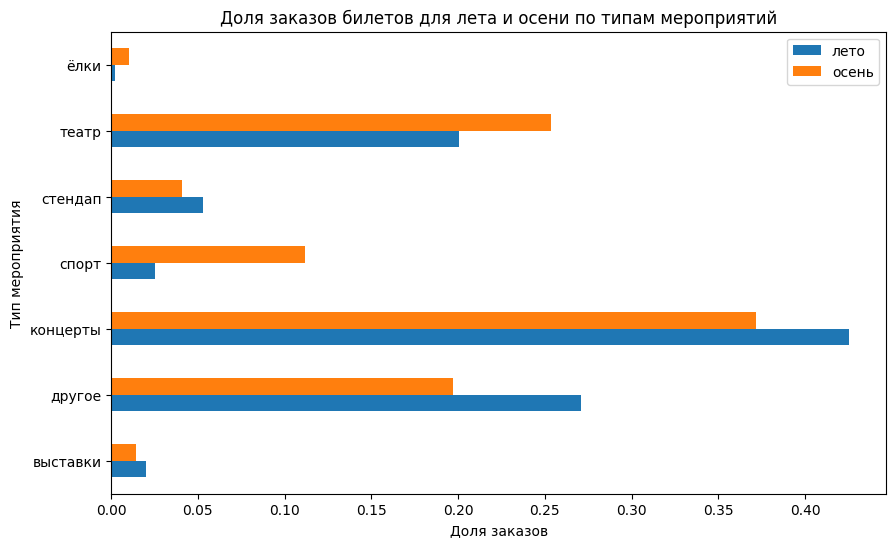

In [101]:
# Делаем визуализацию df_grouped с помощью метода plot(kind='bar'....)
df_share_by_season.plot(kind='barh',
                title='Доля заказов билетов для лета и осени по типам мероприятий',
                rot=0,
                figsize=(10, 6))
plt.xlabel('Доля заказов')
plt.ylabel('Тип мероприятия')
# Отображаем график
plt.show()

In [102]:
# Дополнительно посмотрим на типы мероприятий
# Группируем данные и считаем показатели по типам мероприятий
df_grouped1 = df_filtered.groupby('event_type_description')['season'].value_counts().unstack(fill_value=0)
df_grouped1

season,лето,осень
event_type_description,,
балет,2352,3583
выставка,2443,3430
концерт,47523,62745
кукольный спектакль,0,13
музыкальный спектакль,53,87
мюзикл,4337,5452
опера,458,842
оперетта,7,0
подарок,0,4


In [103]:
# Группируем по типу мероприятия и сезону, считаем абсолютные количества
df_counts1 = df_filtered.groupby(['event_type_description', 'season'],observed=False).size().unstack(fill_value=0)

# Вычисляем доли каждого типа мероприятий в каждом сезоне
df_share_by_season1 = df_counts1.div(season_totals, axis=1)

# Результат
df_share_by_season1

,лето,осень
event_type_description,,
балет,0.019708,0.021252
выставка,0.020471,0.020344
концерт,0.398209,0.372155
кукольный спектакль,0.000000,0.000077
музыкальный спектакль,0.000444,0.000516
мюзикл,0.036341,0.032337
опера,0.003838,0.004994
оперетта,0.000059,0.000000
подарок,0.000000,0.000024


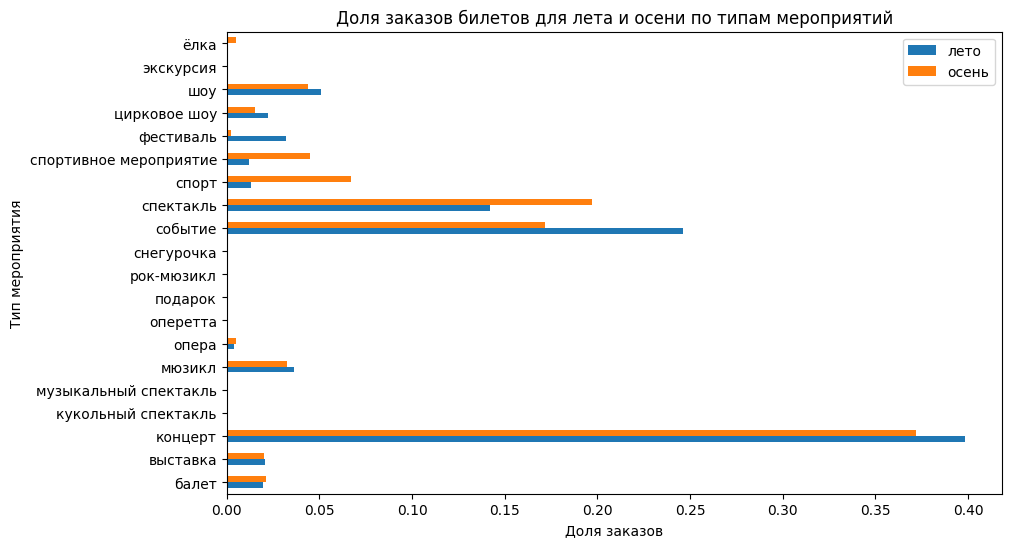

In [104]:
# Делаем визуализацию df_grouped с помощью метода plot(kind='bar'....)
df_share_by_season1.plot(kind='barh',
                title='Доля заказов билетов для лета и осени по типам мероприятий',
                rot=0,
                figsize=(10, 6))
plt.xlabel('Доля заказов')
plt.ylabel('Тип мероприятия')
# Отображаем график
plt.show()

Осенью по сравнению с летом:
- сильнее всего выросла доля спортивных мероприятий с 2.5% до 11%, также доля театральных мероприятий выросла с 20% до 25%
- снизилазь доля концертов с 43% до 37%, мероприятий в графе другое с 27% до 20%

#### По типам устройств

In [107]:
# Группируем по типу устройств и сезону, считаем абсолютные количества
df_counts2 = df_filtered.groupby(['device_type_canonical', 'season'],observed=False).size().unstack(fill_value=0)

# Вычисляем доли каждого типа устройств в каждом сезоне
df_share_by_season2 = df_counts2.div(season_totals, axis=1)

# Результат
df_share_by_season2

,лето,осень
device_type_canonical,,
desktop,0.193721,0.203441
mobile,0.806279,0.796559


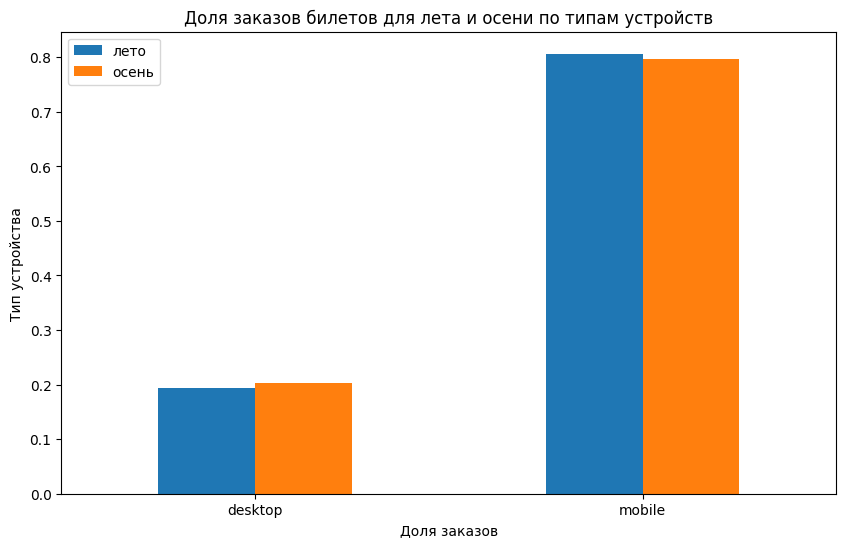

In [108]:
# Делаем визуализацию с помощью метода plot(kind='bar'....)
df_share_by_season2.plot(kind='bar',
                title='Доля заказов билетов для лета и осени по типам устройств',
                rot=0,
                figsize=(10, 6))
plt.xlabel('Доля заказов')
plt.ylabel('Тип устройства')
# Отображаем график
plt.show()

 - Доля десктопных устройств увеличилась на 1 процетный пункт осенью.
 - Существенных изменений нет

#### По возрастному рейтингу

In [111]:
# Группируем по возрастному рейтингу и сезону, считаем абсолютные количества
df_counts3 = df_filtered.groupby(['age_limit', 'season'],observed=False).size().unstack(fill_value=0)

# Вычисляем доли каждого возрастного рейтинга в каждом сезоне
df_share_by_season3 = df_counts3.div(season_totals, axis=1)

# Результат
df_share_by_season3

,лето,осень
age_limit,,
0,0.179333,0.236217
6,0.181638,0.176300
12,0.205703,0.220832
16,0.283019,0.262249
18,0.150308,0.104402


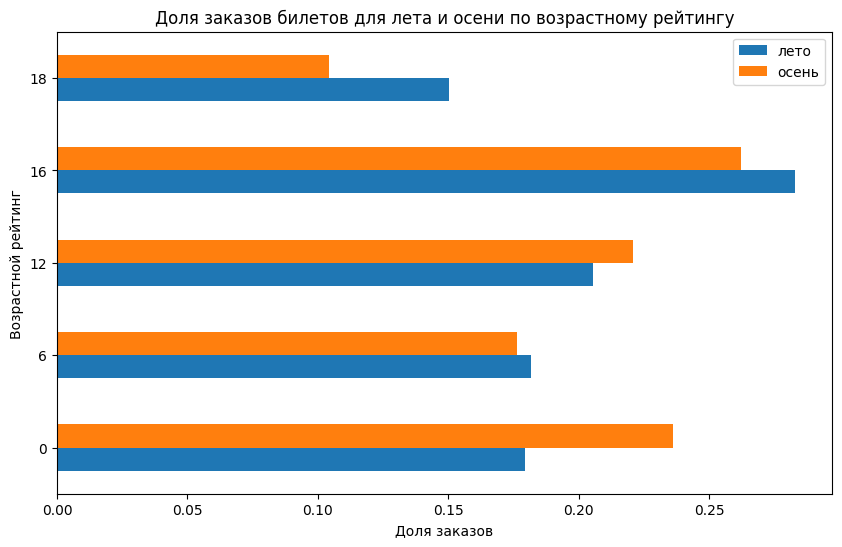

In [112]:
# Делаем визуализацию с помощью метода plot(kind='bar'....)
df_share_by_season3.plot(kind='barh',
                title='Доля заказов билетов для лета и осени по возрастному рейтингу',
                rot=0,
                figsize=(10, 6))
plt.xlabel('Доля заказов')
plt.ylabel('Возрастной рейтинг')
# Отображаем график
plt.show()

Осенью по сравнению с летом:
- сильнее всего выросла доля 0+ мероприятий с 18% до 23.6%, также доля 12+ мероприятий выросла с 20.6% до 22%
- снизилазь доля 18+ мероприятий с 15% до 10.4%, мероприятий 16+ с 28.3% до 26%
-  снижение 18+ и 16+ мероприятий связано со снижением доли музыкальных концертов, поскольку они проходят в клубах и обычно есть возрастные ограничения

#### Изменение выручки с продажи одного билета  для лета и осени 

In [115]:
# Группируем данные и считаем показатели по типам мероприятий
df_grouped_one_ticket_revenue_rub = df_filtered.groupby(['event_type_main', 'season'],observed=False)['one_ticket_revenue_rub'].mean().unstack(fill_value=0)
df_grouped_one_ticket_revenue_rub = round(df_grouped_one_ticket_revenue_rub,2)
df_grouped_one_ticket_revenue_rub


season,лето,осень
event_type_main,,
выставки,86.42,90.60
другое,77.46,76.12
концерты,305.03,268.09
спорт,50.76,49.97
стендап,218.52,231.12
театр,214.13,175.98
ёлки,271.44,229.58


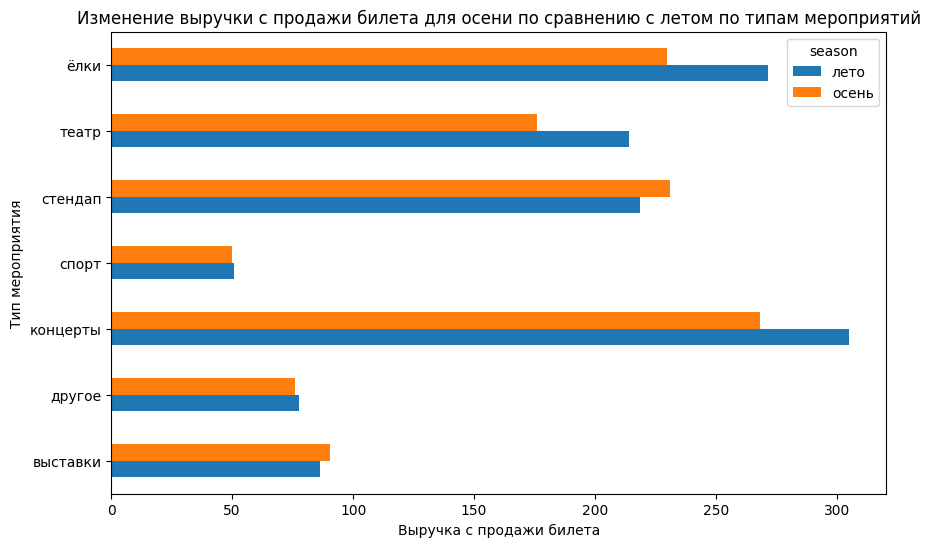

In [116]:
# Делаем визуализацию с помощью метода plot(kind='bar'....)
df_grouped_one_ticket_revenue_rub.plot(kind='barh',
                title='Изменение выручки с продажи билета для осени по сравнению с летом по типам мероприятий',
                rot=0,
                figsize=(10, 6))
plt.xlabel('Выручка с продажи билета')
plt.ylabel('Тип мероприятия')
# Отображаем график
plt.show()

In [117]:
# Расчет относительного изменения осенних значений по сравнению с летними
df_grouped_one_ticket_revenue_rub.columns = df_grouped_one_ticket_revenue_rub.columns.astype(str)
df_grouped_one_ticket_revenue_rub = df_grouped_one_ticket_revenue_rub.assign(
    **{'изменение(%)': round(((df_grouped_one_ticket_revenue_rub['осень'] - df_grouped_one_ticket_revenue_rub['лето']) / df_grouped_one_ticket_revenue_rub['лето']) * 100, 2)}
)
df_grouped_one_ticket_revenue_rub

season,лето,осень,изменение(%)
event_type_main,,,
выставки,86.42,90.60,4.84
другое,77.46,76.12,-1.73
концерты,305.03,268.09,-12.11
спорт,50.76,49.97,-1.56
стендап,218.52,231.12,5.77
театр,214.13,175.98,-17.82
ёлки,271.44,229.58,-15.42


<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

    
Тут аналогично падает код

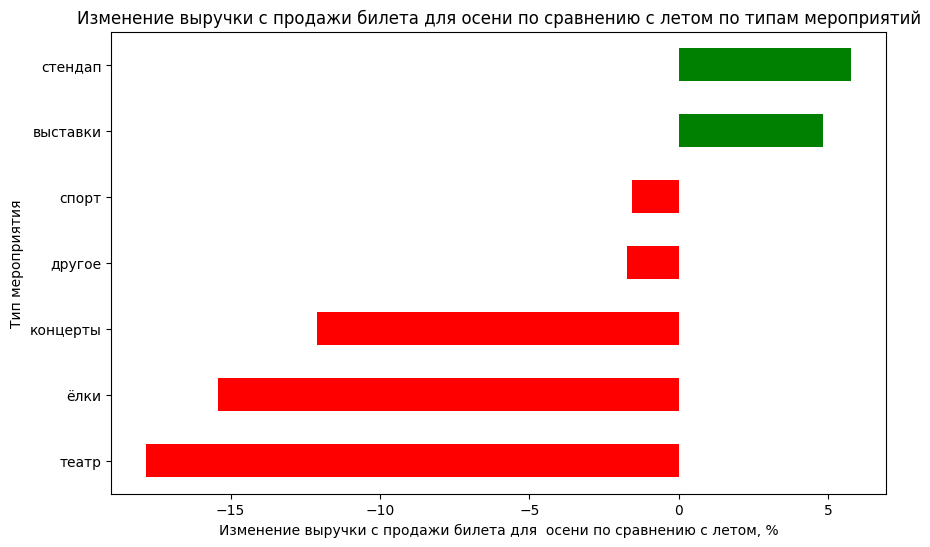

In [119]:
df_grouped_one_ticket_revenue_rub.sort_values('изменение(%)', inplace=True)
colors = ['green' if x > 0 else 'red' for x in df_grouped_one_ticket_revenue_rub['изменение(%)']]

ax = df_grouped_one_ticket_revenue_rub['изменение(%)'].plot(kind='barh',
                title='Изменение выручки с продажи билета для осени по сравнению с летом по типам мероприятий',
                rot=0,
                figsize=(10, 6),
                color=colors)
plt.xlabel('Изменение выручки с продажи билета для  осени по сравнению с летом, %')
plt.ylabel('Тип мероприятия')

# Отображаем график
plt.show()

Осенью по сравнению с летом выручка с билета:
- увеличилась для стендапов 5.77% и выставок 4.84%
- уменьшилась для остальных категорий. Больше всего для театра 17.82%, ёлок 15.42%  и концертов 12.11%

### Промежуточный вывод

Изменения  распределения заказов в каждой категории с наступлением осени: 
- Фиксируем увеличение общего количества заказов от июня (34 тыс.) к ноябрю (99 тыс.) 2024 года.
- Сильнее всего выросла доля спортивных мероприятий с 2.5% до 11%, также доля театральных мероприятий выросла с 20% до 25%. Снизилазь доля концертов с 43% до 37%, мероприятий в графе другое с 27% до 20%
- Существенных изменений  в долях десктопных и мобильных устройств нет. Доля десктопных устройств увеличилась на 1 процетный пункт.
- Сильнее всего выросла доля 0+ мероприятий с 18% до 23.6%, также доля 12+ мероприятий выросла с 20.6% до 22%
- Снизилазь доля 18+ мероприятий с 15% до 10.4%, мероприятий 16+ с 28.3% до 26%
- Снижение 18+ и 16+ мероприятий связано со снижением доли музыкальных концертов, поскольку они проходят в клубах и обычно есть возрастные ограничения
- Выручка с билета уменьшилась для большинства категорий мероприятий, больше всего для театра 17.82%, ёлок 15.42% и концертов 12.11% . Увеличение для стендапов 5.77% и выставок 4.84%. 
  

### 5.2. Осенняя активность пользователей

#### Динамика изменений по дням

In [125]:
df_autumn  = df_filtered[df_filtered['season'] == 'осень']

In [126]:
#Проверяем, чтобы в данных была только осень
df_autumn['season'].value_counts()

осень    168599
лето          0
Name: season, dtype: int64

In [127]:
# Создаем сводную таблицу
pivot_table = pd.pivot_table(
    df_autumn,
    values=['order_id', 'user_id','revenue','tickets_count'],  # Какие значения агрегируем
    index=['created_dt_msk'],  # По каким индексам
    aggfunc={'order_id': 'count', 'user_id': 'nunique','revenue':'sum','tickets_count':'sum'}  # Какие функции агрегации применяем
)
pivot_table = pivot_table.rename(columns={
        'order_id': 'число_заказов',
        'user_id': 'число_пользователей',
        'revenue': 'выручка',
        'tickets_count':'число_билетов'})
tmp_table = pivot_table.copy()
pivot_table



,число_заказов,выручка,число_билетов,число_пользователей
created_dt_msk,,,,
2024-09-01,1327,733571.82,3718.0,564
2024-09-02,1380,777955.47,3704.0,574
2024-09-03,5111,1229176.90,15290.0,778
2024-09-04,1773,950093.25,4802.0,685
2024-09-05,1944,1106281.15,5214.0,739
...,...,...,...,...
2024-10-27,2849,1475416.87,7867.0,1034
2024-10-28,2838,1369752.08,7927.0,985
2024-10-29,2835,1371763.14,7960.0,998


In [128]:
pivot_table['среднее_число_заказов_на_пользователя'] = round(pivot_table['число_заказов']/pivot_table['число_пользователей'],2)
pivot_table['средняя_стоимость_билета'] = round(pivot_table['выручка']/pivot_table['число_билетов'],2)


In [129]:
# Собираем  таблицу с динамикой общего числа заказов; количества активных пользователей DAU; среднего числа заказов на одного пользователя;средней стоимости одного билета.
pivot_table1 = pivot_table[['число_заказов','число_пользователей','среднее_число_заказов_на_пользователя','средняя_стоимость_билета']]
pivot_table1

,число_заказов,число_пользователей,среднее_число_заказов_на_пользователя,средняя_стоимость_билета
created_dt_msk,,,,
2024-09-01,1327,564,2.35,197.30
2024-09-02,1380,574,2.40,210.03
2024-09-03,5111,778,6.57,80.39
2024-09-04,1773,685,2.59,197.85
2024-09-05,1944,739,2.63,212.18
...,...,...,...,...
2024-10-27,2849,1034,2.76,187.55
2024-10-28,2838,985,2.88,172.80
2024-10-29,2835,998,2.84,172.33


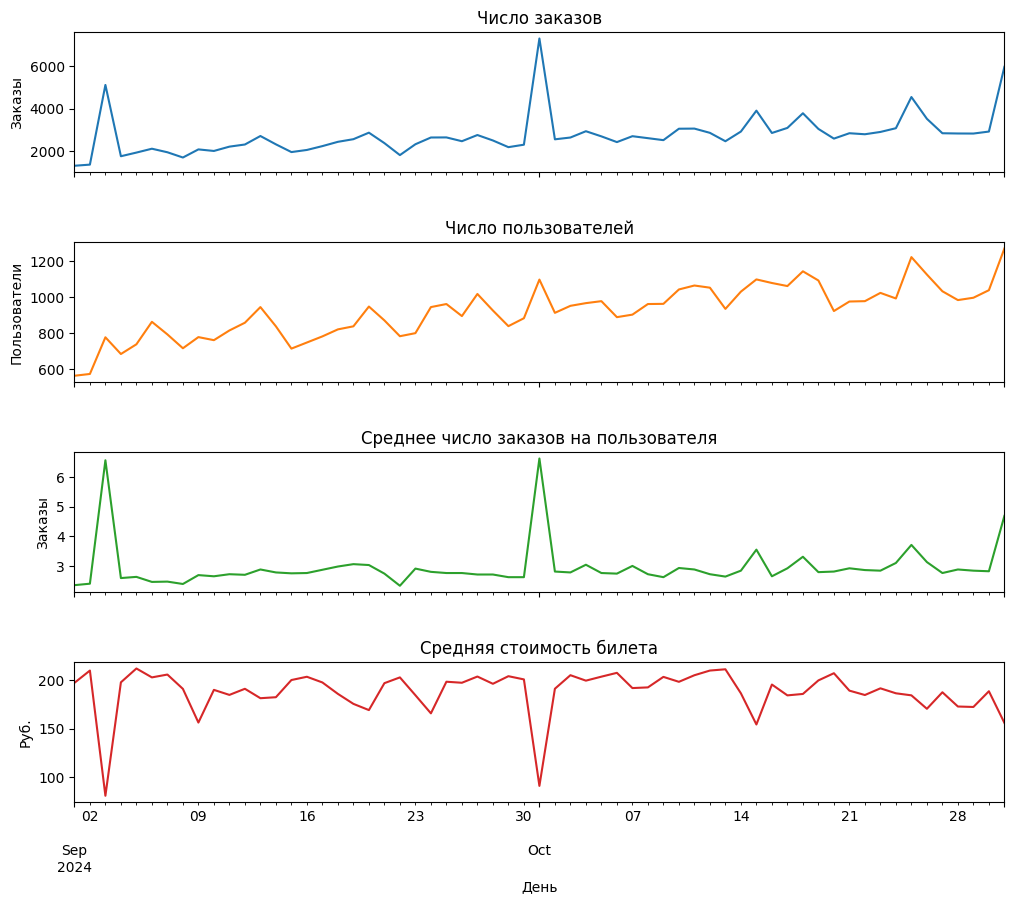

In [130]:

# Строим график
axes = pivot_table1.plot(kind='line',
                   subplots=True,
                   sharex=True,
                   sharey=False,
                   legend=False,
                   figsize=(12, 10),
                   title=['Число заказов', 'Число пользователей','Среднее число заказов на пользователя','Cредняя стоимость билета'])

# Устанавливаем подпись для оси Y каждого из подграфиков
axes[0].set_ylabel('Заказы')
axes[1].set_ylabel('Пользователи')
axes[2].set_ylabel('Заказы')
axes[3].set_ylabel('Руб.')
# Подписываем ось X
plt.xlabel('День')
plt.subplots_adjust(hspace=0.5)
plt.show()



- Все графики изменяются циклично, графики  кол-ва пользователей и числа заказов имеет выраженный тренд на повышение
- Для числа заказов максимальное значение (более 7 тыс.) -  1 октября, вторник и минимальное (1327) - 1 сентября, восресенье
- Локальные максимумы  и минимумы числа заказов совпадают с числом пользователей и средним числом заказов, а вот средняя стоимость билеты, наоборот падает при росте числа заказов
- Это может быть связоно с тем, что в связи с большим количеством купленных билетов, растёт размер скидки и средняя стоимость билета снижается
  



<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Лучше после каждого раздела, графика (или серии тестов) писать вывод по полученным данным с учетом поставленной бизнес задачи - так проще читать проект, поскольку будущим коллегам или заказчику не надо будет самим интерпретировать результаты каждого раздела, теста или графика.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Отсутствует решение шага по дням неделям. Добавь, пожалуйста

<div class="alert alert-info"> <b>Комментарии студента:</b> Добавил анализ.</div>

#### Недельная цикличность

In [136]:
# Делаем таблицу для недельной цикличности
tmp_table = tmp_table.reset_index()
tmp_table['day_of_week'] = tmp_table['created_dt_msk'].dt.day_of_week
tmp_table = tmp_table[['число_заказов','выручка','число_билетов','число_пользователей','day_of_week']]
tmp_table = tmp_table.groupby('day_of_week').sum()

In [137]:
tmp_table['среднее_число_заказов_на_пользователя'] = round(tmp_table['число_заказов']/tmp_table['число_пользователей'],2)
tmp_table['средняя_стоимость_билета'] = round(tmp_table['выручка']/tmp_table['число_билетов'],2)
tmp_table = tmp_table[['число_заказов','число_пользователей','среднее_число_заказов_на_пользователя','средняя_стоимость_билета']]
tmp_table

,число_заказов,число_пользователей,среднее_число_заказов_на_пользователя,средняя_стоимость_билета
day_of_week,,,,
0,21515,7685,2.80,187.10
1,31477,8408,3.74,139.44
2,22888,8309,2.75,192.99
3,27167,8659,3.14,185.19
4,24828,8181,3.03,190.64
5,21335,7686,2.78,194.79
6,19389,7404,2.62,201.41


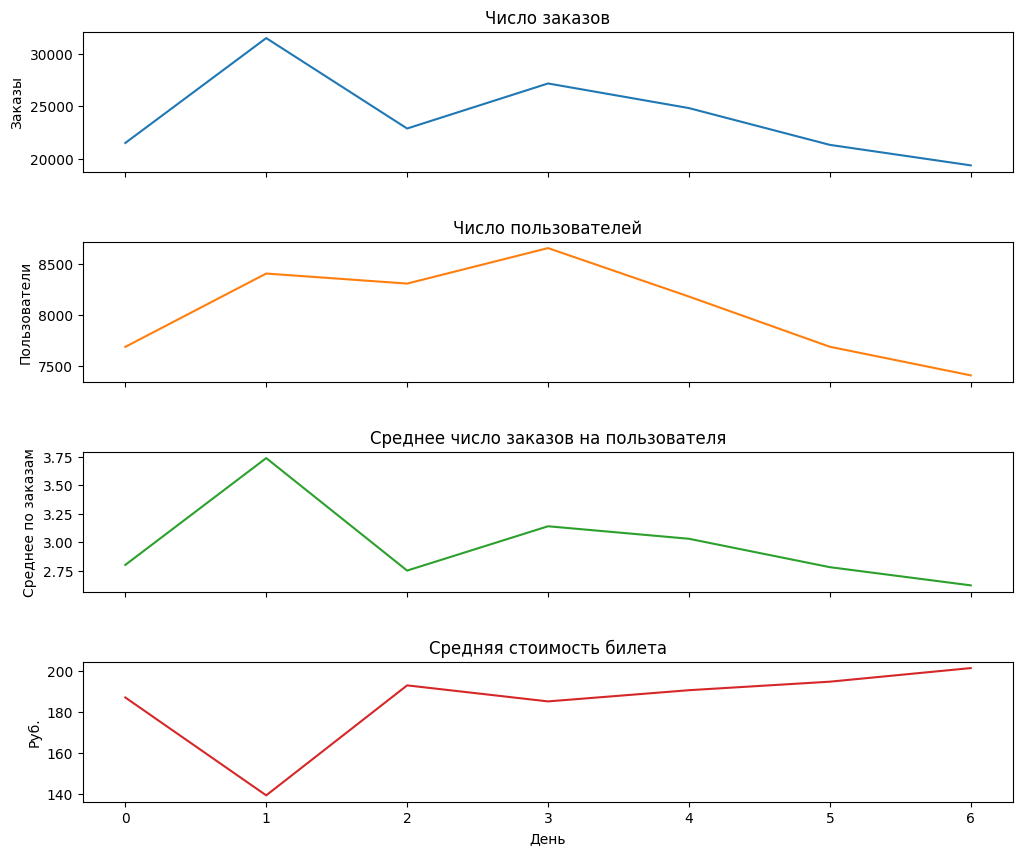

In [138]:
# Строим график
axes1 = tmp_table.plot(kind='line',
                   subplots=True,
                   sharex=True,
                   sharey=False,
                   legend=False,
                   figsize=(12, 10),
                   title=['Число заказов', 'Число пользователей','Среднее число заказов на пользователя','Cредняя стоимость билета'])

# Устанавливаем подпись для оси Y каждого из подграфиков
axes1[0].set_ylabel('Заказы')
axes1[1].set_ylabel('Пользователи')
axes1[2].set_ylabel('Среднее по заказам')
axes1[3].set_ylabel('Руб.')
# Подписываем ось X
plt.xlabel('День')
plt.subplots_adjust(hspace=0.5)
plt.show()

- Активность пользователей выше всего со вторника по пятницу с пиком во вторник и ниже в понедельник и выходные
- Это можно объяснить тем, что большинство мероприятий проходит в выходные и пользователи покупают билеты на них в будни заранее за несколько дней до проведения
- График средней стоимости билета наоборот, растёт в будни и падает в выходные. Это может быть связано со скидкой на покупку нескольких билетов

### Промежуточный вывод

- Все графики изменяются циклично, графики  кол-ва пользователей и числа заказов имеет выраженный тренд на повышение
- Для числа заказов максимальное значение (более 7 тыс.) -  1 октября, вторник и минимальное (1327) - 1 сентября, восресенье
- Локальные максимумы  и минимумы числа заказов совпадают с числом пользователей и средним числом заказов, а вот средняя стоимость билеты, наоборот падает при росте числа заказов
- Активность пользователей выше всего со вторника по пятницу с пиком во вторник и ниже в понедельник и выходные
- Это можно объяснить тем, что большинство мероприятий проходит в выходные и пользователи покупают билеты на них в будни заранее за несколько дней до проведения
- График средней стоимости билета наоборот, растёт в будни и падает в выходные. Это может быть связано со скидкой на покупку нескольких билетов

### 5.3. Популярные события и партнёры

In [142]:
# Создаем сводную таблицу для показателей регионов
pivot_table_regins = pd.pivot_table(
    df_autumn,
    values=['event_id', 'order_id'],  # Какие значения агрегируем
    index=['region_name'],  # По каким индексам
    aggfunc={'event_id': 'nunique', 'order_id': 'count'}  # Какие функции агрегации применяем
)
pivot_table_regins = pivot_table_regins.rename(columns={
        'order_id': 'число_заказов',
        'event_id': 'число_мероприятий'
        })
pivot_table_regins = pivot_table_regins.sort_values(by='число_мероприятий', ascending=False)
pivot_table_regins['доля_мероприятий'] = round(pivot_table_regins['число_мероприятий'] /pivot_table_regins['число_мероприятий'].sum(),2)
pivot_table_regins['доля_заказов'] = round(pivot_table_regins['число_заказов'] /pivot_table_regins['число_заказов'].sum(),2)
#pivot_table_regins
pivot_table_regins.head(10)

,число_мероприятий,число_заказов,доля_мероприятий,доля_заказов
region_name,,,,
Каменевский регион,3910,46681,0.25,0.28
Североярская область,2613,20718,0.16,0.12
Широковская область,803,8715,0.05,0.05
Светополянский округ,764,4778,0.05,0.03
Речиновская область,529,3565,0.03,0.02
Серебринская область,456,4467,0.03,0.03
Яблоневская область,432,4199,0.03,0.02
Тепляковская область,419,2484,0.03,0.01
Горицветская область,406,3229,0.03,0.02


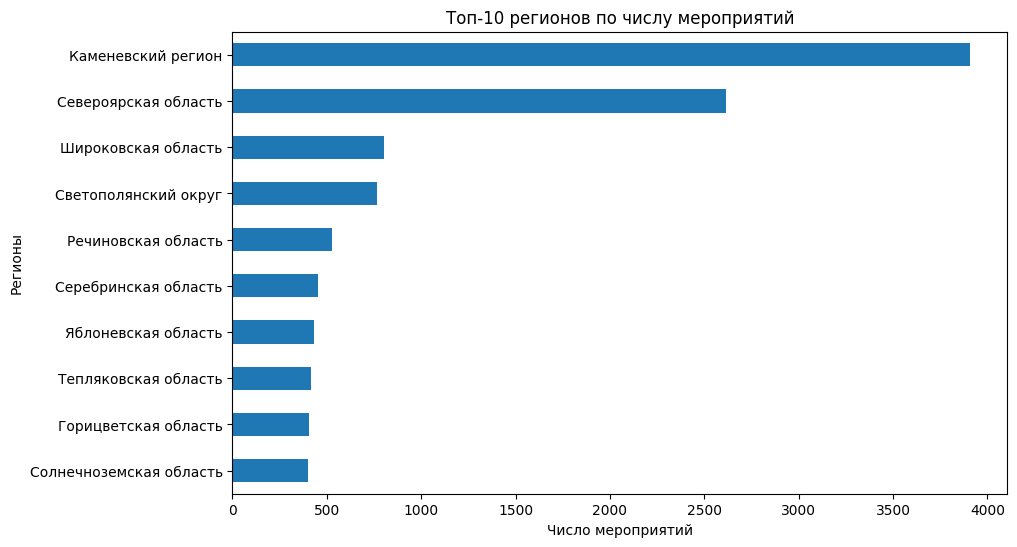

In [143]:
# Делаем визуализацию с помощью метода plot(kind='bar'....)
pivot_table_regins['число_мероприятий'].head(10).sort_values().plot(kind='barh',
                title='Топ-10 регионов по числу мероприятий',
                rot=0,
                figsize=(10, 6))
plt.xlabel('Число мероприятий')
plt.ylabel('Регионы')
# Отображаем график
plt.show()

<div class="alert alert-info"> <b>Комментарии студента:</b> Добавил топ-10 регионов</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

    
Для признаков с большим количеством уникальных значений стоит визуализировать топ-n значений по частоте, чтобы низкочастотные регионы не смещали акцент в анализе

- Наибольшее разнообразие мероприятий и наибольшее кол-во заказов с большим отрывом имеют Каменевский регион и Североярская область с долей мероприятий в 0.25 и 0.16 соответственно. В этих двух регионах проходят более 40 % всех мероприятий. 

In [147]:
# Создаем сводную таблицу для показателей билетных операторов
pivot_table_service_name = pd.pivot_table(
    df_autumn,
    values=['order_id', 'event_id','revenue'],  # Какие значения агрегируем
    index=['service_name'],  # По каким индексам
    aggfunc={'order_id': 'count', 'event_id': 'nunique','revenue':'sum'}  # Какие функции агрегации применяем
)
pivot_table_service_name = pivot_table_service_name.rename(columns={
        'order_id': 'число_заказов',
        'event_id': 'число_мероприятий',
        'revenue': 'выручка'
        })

pivot_table_service_name = pivot_table_service_name.sort_values(by='выручка', ascending=False)

pivot_table_service_name['выручка'] = round(pivot_table_service_name['выручка'])
pivot_table_service_name['доля_мероприятий'] = round(pivot_table_service_name['число_мероприятий'] /pivot_table_service_name['число_мероприятий'].sum(),2)
pivot_table_service_name['доля_заказов'] = round(pivot_table_service_name['число_заказов'] /pivot_table_service_name['число_заказов'].sum(),2)
pivot_table_service_name['доля_выручки'] = round(pivot_table_service_name['выручка'] /pivot_table_service_name['выручка'].sum(),2)
display(pivot_table_service_name.head(10))

,число_мероприятий,число_заказов,выручка,доля_мероприятий,доля_заказов,доля_выручки
service_name,,,,,,
Билеты без проблем,2847,32382,13538471.0,0.16,0.19,0.16
Мой билет,1006,19418,11636753.0,0.06,0.12,0.14
Облачко,1409,15478,10611052.0,0.08,0.09,0.13
Лови билет!,3616,25792,10376793.0,0.21,0.15,0.12
Весь в билетах,599,9405,9324686.0,0.03,0.06,0.11
Билеты в руки,2471,25730,7613091.0,0.14,0.15,0.09
Край билетов,193,2997,3018373.0,0.01,0.02,0.04
Яблоко,537,3473,2763332.0,0.03,0.02,0.03
Прачечная,728,5798,2548310.0,0.04,0.03,0.03


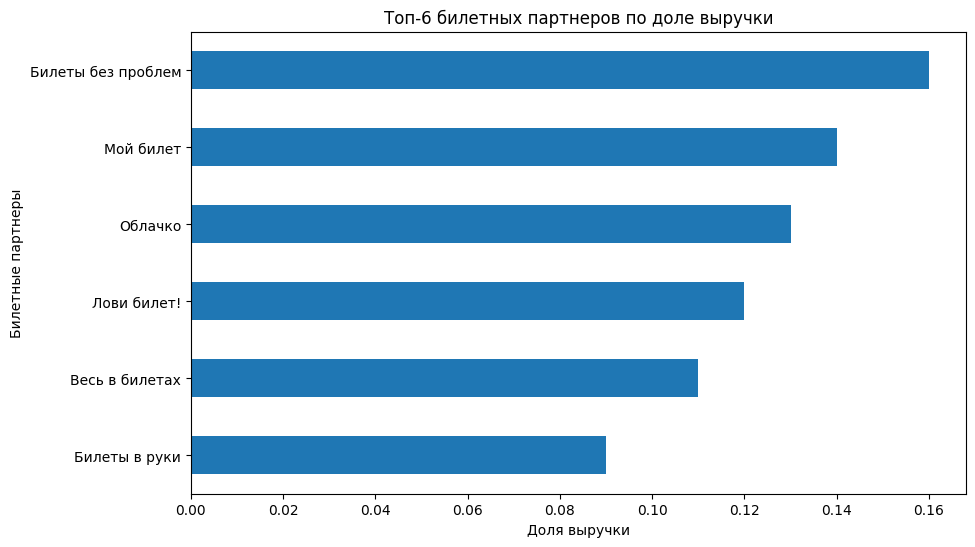

In [148]:
# Делаем визуализацию с помощью метода plot(kind='bar'....)
pivot_table_service_name['доля_выручки'].head(6).sort_values().plot(kind='barh',
                title='Топ-6 билетных партнеров по доле выручки',
                rot=0,
                figsize=(10, 6))
plt.xlabel('Доля выручки')
plt.ylabel('Билетные партнеры')
# Отображаем график
plt.show()

### Промежуточный вывод
- Наибольшее разнообразие мероприятий и наибольшее кол-во заказов с большим отрывом имеют Каменевский регион и Североярская область с долей мероприятий в 0.25 и 0.16 соответственно. В этих двух регионах проходят более 40 % всех мероприятий.
- Можно выделить топ-6 билетных партнеров с большой долей выручки: Билеты без проблем, Мой билет, Облачко, 	Лови билет!, Весь в билетах, Билеты в руки. Их выручка составляет 75% от выручки всех партнеров.

## 5. Статистический анализ данных

#### Проверяем независимость выборок по типам устройств

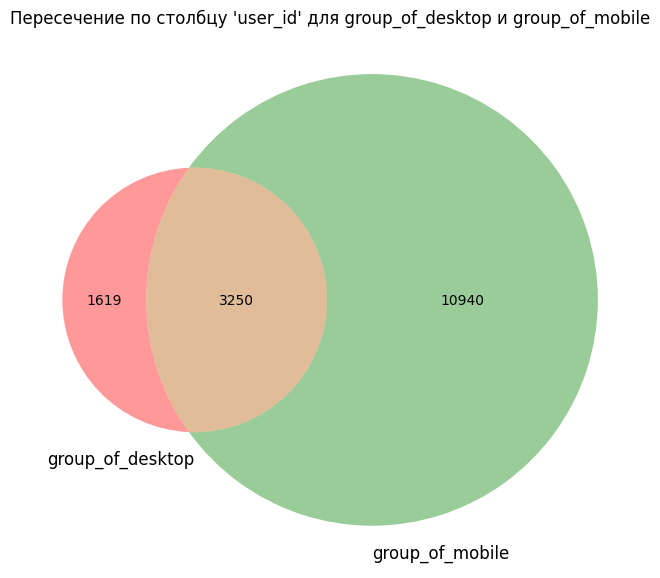

In [152]:
from matplotlib_venn import venn2, venn3
#Проверяем пересечения заказов пользователей по типам устройств
group_of_desktop = df_autumn[df_autumn['device_type_canonical'] == 'desktop']
group_of_mobile = df_autumn[df_autumn['device_type_canonical'] == 'mobile']
#Выводим группы для сравнения
group_of_a_users = set(group_of_desktop['user_id']) 
group_of_b_users = set(group_of_mobile['user_id'])

# Строим диаграмму Венна
plt.figure(figsize=(8, 8))  # Увеличиваем размер графика, чтобы было лучше видно
venn2([group_of_a_users,group_of_b_users], set_labels=('group_of_desktop', 'group_of_mobile'))

# Отображаем график
plt.title("Пересечение по столбцу 'user_id' для group_of_desktop и group_of_mobile")
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

    
К сожалению очень много ошибок. Вынужден остановить ревью 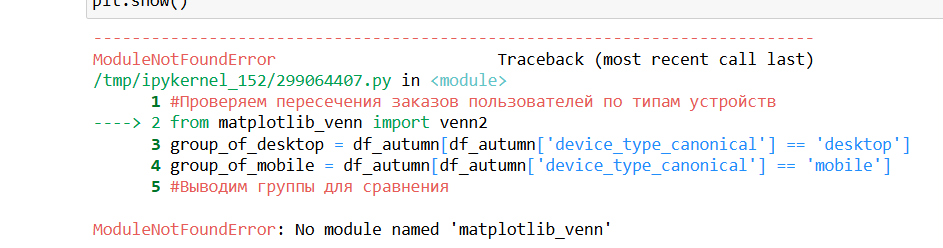

In [154]:
# Получаем заказы с  user_id, которые есть в обеих группах
common_users = set(group_of_desktop['user_id']).intersection(group_of_mobile['user_id'])
#Удаляем пересечения
group_of_desktop = group_of_desktop[~group_of_desktop['user_id'].isin(common_users)]
group_of_mobile = group_of_mobile[~group_of_mobile['user_id'].isin(common_users)]

print(f"Количество пользователей в group_of_desktop после исключения: {group_of_desktop['user_id'].nunique()}")
print(f"Количество пользователей в group_of_mobile после исключения: {group_of_mobile['user_id'].nunique()}")




Количество пользователей в group_of_desktop после исключения: 1619
Количество пользователей в group_of_mobile после исключения: 10940


#### Изучаем выборочные средние количества заказов для  десктопных и  мобильных устройств

#### Десктопы

In [157]:
#Делаем таблицы с пользователем и кол-во его заказов
desktop_users = group_of_desktop.groupby('user_id')['order_id'].count().reset_index()
mobile_users = group_of_mobile.groupby('user_id')['order_id'].count().reset_index()
#Исследуем кол-во заказов  для пользователей десктопной версии
desktop_users['order_id'].describe()

count    1619.000000
mean        1.974676
std         3.061379
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        56.000000
Name: order_id, dtype: float64

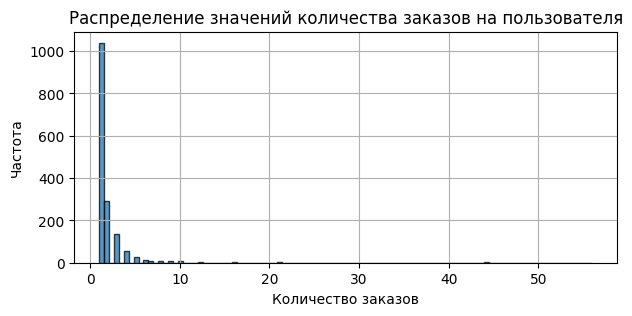

In [158]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
desktop_users['order_id'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=100, # Устанавливаем количество корзин - всего 200
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений количества заказов на пользователя')
plt.xlabel('Количество заказов')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

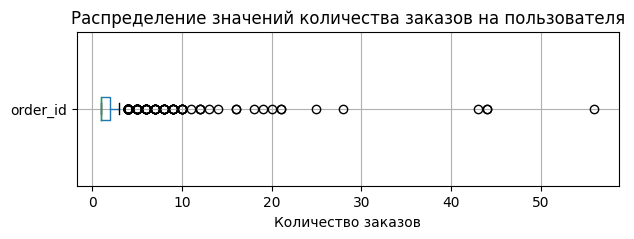

In [159]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
desktop_users.boxplot(column='order_id', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества заказов на пользователя')
plt.xlabel('Количество заказов')

# Выводим график
plt.show()

#### Мобилки

In [161]:
#Исследуем кол-во заказов  для пользователей мобильной версии
mobile_users['order_id'].describe()

count    10940.000000
mean         2.858227
std          4.096392
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        123.000000
Name: order_id, dtype: float64

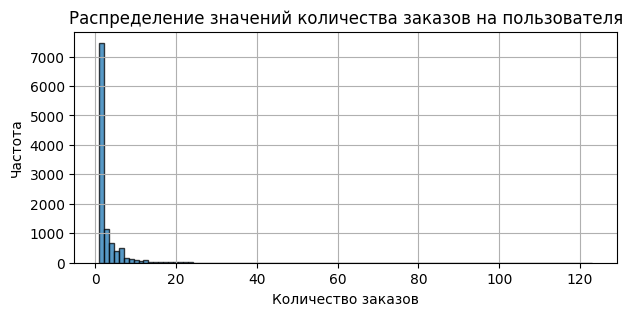

In [162]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
mobile_users['order_id'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=100, # Устанавливаем количество корзин - всего 200
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений количества заказов на пользователя')
plt.xlabel('Количество заказов')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

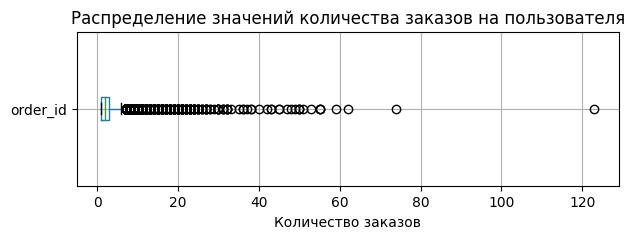

In [163]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
mobile_users.boxplot(column='order_id', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества заказов на пользователя')
plt.xlabel('Количество заказов')

# Выводим график
plt.show()

#### Промежуточный вывод
- Среднее количество заказов для десктопных устройств 1.97, а для мобильных - 2.85. 
- При этом в данных есть тяжелые хвосты и большое среднее отклонение
- Поэтому следует учесть медиану в 1 заказ для десктопных устройств и 2 заказа для мобильных соответственно. 

#### Изучаем выборочные средние времени между заказами  для  десктопных и  мобильных устройств

#### Десктопы

In [167]:
group_of_desktop['days_since_prev'].describe()

count    2078.000000
mean       18.061598
std        32.669455
min         0.000000
25%         0.000000
50%         0.000000
75%        22.000000
max       146.000000
Name: days_since_prev, dtype: float64

In [168]:
group_of_desktop['days_since_prev'].value_counts()

0.0      1278
1.0        41
2.0        24
3.0        22
7.0        20
         ... 
107.0       1
99.0        1
141.0       1
138.0       1
127.0       1
Name: days_since_prev, Length: 134, dtype: int64

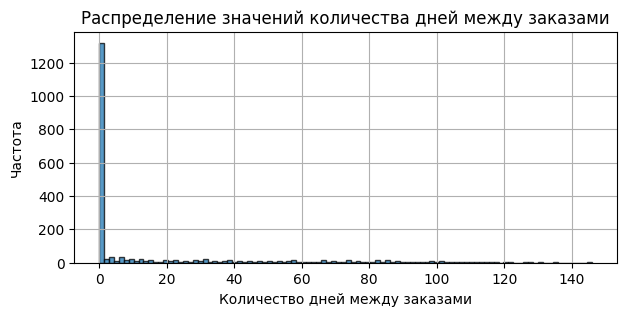

In [169]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
group_of_desktop['days_since_prev'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=100, # Устанавливаем количество корзин - всего 200
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений количества дней между заказами')
plt.xlabel('Количество дней между заказами')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

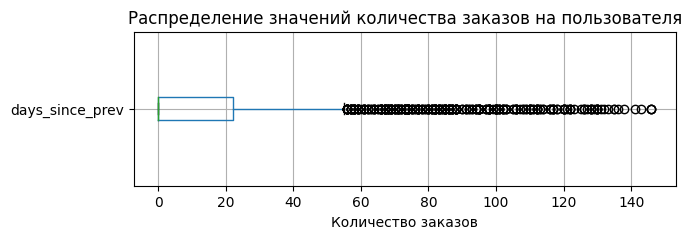

In [170]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
group_of_desktop.boxplot(column='days_since_prev', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества заказов на пользователя')
plt.xlabel('Количество заказов')

# Выводим график
plt.show()

#### Мобилки

In [172]:
group_of_mobile['days_since_prev'].describe()

count    24589.000000
mean        13.788564
std         25.715110
min          0.000000
25%          0.000000
50%          1.000000
75%         15.000000
max        148.000000
Name: days_since_prev, dtype: float64

In [173]:
group_of_mobile['days_since_prev'].value_counts()

0.0      11852
1.0       1347
2.0        731
3.0        685
4.0        525
         ...  
145.0        3
138.0        3
143.0        2
147.0        2
141.0        1
Name: days_since_prev, Length: 148, dtype: int64

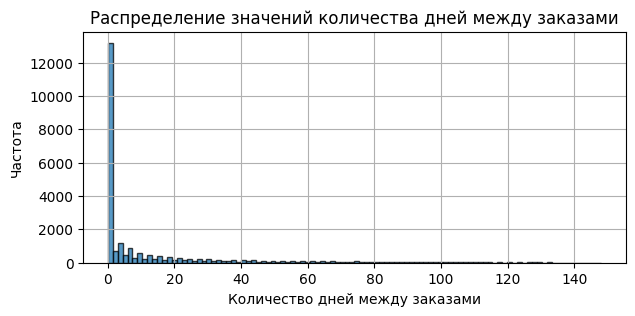

In [174]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
group_of_mobile['days_since_prev'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=100, # Устанавливаем количество корзин - всего 200
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений количества дней между заказами')
plt.xlabel('Количество дней между заказами')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

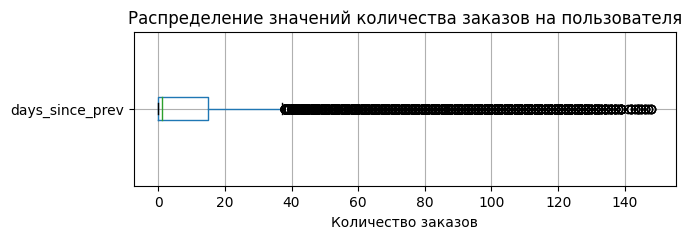

In [175]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
group_of_mobile.boxplot(column='days_since_prev', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества заказов на пользователя')
plt.xlabel('Количество заказов')

# Выводим график
plt.show()

#### Промежуточный вывод
- Среднее время между заказами для десктопных устройств 18 дней, а для мобильных - 13.8 дней
- При этом в данных есть тяжелые хвосты и большое среднее отклонение, около половины значений равны 0
- Поэтому следует учесть медиану в 0 дней для десктопных устройств и 1 день для мобильных соответственно.

###  Проверка гипотезы

Пользователи мобильных устройств более активны, чем пользователи десктопных устройств. Для проверки мы используем две гипотезы
- 1.Первая гипотеза:
- Нулевая гипотеза H₀: Среднее количество заказов на одного пользователя в двух группах (десктопные и мобильные устройства) не различается.
- Альтернативная гипотеза H₁: Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо.

In [179]:
#Теперь Тест Манна — Уитни
from scipy.stats import ttest_ind, mannwhitneyu
# Выборка целевой метрики для группы A
metric_a = desktop_users['order_id']
# Выборка целевой метрики для группы B
metric_b= mobile_users['order_id']

# На каком уровне значимости проверяем гипотезу о равенстве распределений
alpha = 0.05 

# Применяем тест Манна — Уитни
stat_mw, p_value_mw = mannwhitneyu(
    metric_a, 
    metric_b, 
    alternative='less' # Альтернативная гипотеза Dist(a) < Dist(b)
) 

if p_value_mw > alpha:
    print(f'pvalue={p_value_mw} > {alpha}')
    print('Нулевая гипотеза находит подтверждение! Среднее количество заказов на одного пользователя в двух группах (десктопные и мобильные устройства) не различается.')
else:
    print(f'pvalue={p_value_mw} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения! Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо')

pvalue=5.817682075281702e-39 < 0.05
Нулевая гипотеза не находит подтверждения! Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо


- 2.Вторая гипотеза:
- Нулевая гипотеза H₀: Среднее время между заказами  для пользователей в двух группах (десктопные и мобильные устройства) не различается.
- Альтернативная гипотеза H₁: Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо.

In [181]:
#Теперь Тест Манна — Уитни
from scipy.stats import ttest_ind, mannwhitneyu
# Выборка целевой метрики для группы A
metric_a1 = group_of_desktop['days_since_prev']
# Выборка целевой метрики для группы B
metric_b1= group_of_mobile['days_since_prev']
# Удаляет строки с NaN 
metric_a1 = metric_a1.dropna()  
metric_b1 = metric_b1.dropna() 
# На каком уровне значимости проверяем гипотезу о равенстве распределений
alpha1 = 0.05 

# Применяем тест Манна — Уитни
stat_mw, p_value_mw = mannwhitneyu(
    metric_a1, 
    metric_b1, 
    alternative='less' # Альтернативная гипотеза Dist(a) < Dist(b)
) 

if p_value_mw > alpha:
    print(f'pvalue={p_value_mw} > {alpha}')
    print('Нулевая гипотеза находит подтверждение! Среднее время между заказами для пользователей в двух группах (десктопные и мобильные устройства) не различается.')
else:
    print(f'pvalue={p_value_mw} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!  Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо.')

pvalue=5.221394510489216e-08 < 0.05
Нулевая гипотеза не находит подтверждения!  Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств, и это различие статистически значимо.


- Результаты теста вступают в противоречие с ранее полученными данными, что среднее время между заказами для десктопных устройств 18 дней, а для мобильных - 13.8 дней
- С другой стороны медиана для десктопных устройств 0 дней и 62% значений равны 0 , а для мобильных 1 день и только 48 % значений равны 0.
- Тест Манна-Уитни - это тест рангов, а не средних.  Он проверяет, различаются ли распределения двух выборок, а не медианные значения. Поэтому результаты теста можно принять 

 - Поскольку мы проверяем две гипотезы на одном наборе данных, то следует учесть ошибку  FWER. Используем поправку Бонферрони , поскольку метрики среднее количество заказов  и среднее время между заказами связаны. 

In [184]:
p_values = [5.817682075281702e-39, 5.221394510489216e-08]
fwer = 0.05

# количество гипотез
n_tests = 2 # введите ваш код тут

# рассчитываем скорректированный уровень значимости
alpha_corr = fwer/n_tests # введите ваш код тут

# подсчёт количества отвергнутых нулевых гипотез
rejected_count = sum([1 for p_value in p_values if p_value < alpha_corr])
                           

# отвергнутые гипотезы
rejected_index = [index + 1 for index in range(len(p_values)) if p_values[index] <= alpha_corr]

# результаты
print(f"Скорректированный уровень значимости: {alpha_corr:.4f}")
print(f"Количество отвергнутых нулевых гипотез: {rejected_count}")
print(f"Номера отвергнутых нулевых гипотез: {rejected_index}")

Скорректированный уровень значимости: 0.0250
Количество отвергнутых нулевых гипотез: 2
Номера отвергнутых нулевых гипотез: [1, 2]


### Промежуточный вывод
- Проверили гипотезы с помощью теста Манна-Уитни, поскольку в  данных есть тяжелые хвосты.
- Учли ошибку FWER и дополнительно проверили гипотезы с помощью поправки Бонферрони 
- Альтернативная гипотеза 1 подтвердилась. Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
- Альтернативная гипотеза 2 подтвердлилась. Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.
- Версию о большей активности пользователей мобильных устройств в целом можно подтвердить
- Хотя лично мне кажется, что большая активность пользователей предполагает, что вторая гипотеза должна быть сформулирована `наоборот`, что "Среднее время между заказами пользователей мобильных приложений `ниже` по сравнению с пользователями стационарных устройств". Ведь если пользователь активно заказывает, то промежутки между заказами должны быть ниже. 

## 6. Общий вывод и рекомендации


1. Загрузили данные и познакомились с ними. Подготовили единый датафрейм
- Названия столбцов корректны, значения соответствуют описанным данным
- Пропуски обнаружили только в столбце days_since_prev в таблице orders_df
- Столбцы created_dt_msk и created_ts_msk являются датами. Следует преобразовать их к типу datetime64
- Соединили orders_df и events_df с  помощью left join, чтобы  не потерять данные о заказах
2. Проверили ошибки в данных, провели предобработку
- Изучены пропуски. Пропуски обнаружились в столбцах, которые соответствовали events_df - 238 пропусков, менее 0.1%. Также 8% пропусков в столбце days_since_prev, что говорит о кол-ве заказов, которые были сделаны пользователями впервые. Пропуски оставили как есть.
- Изучили  категориальные значения. Они выглядят корректными.
- Изучили числовые значения. Распределение значений revenue в рублях имело тяжёлый правый хвост с множеством выбросов.Офильтровали данные по 99 процентилю. Удалено 2858 строк. Распределение значений revenue в тенге имели лучший вид, их оставили как есть.
- Проверили на явные и неявные дупликаты. Обнаружено 50 строк с неявными дубликатами по столбцам 'user_id', 'created_ts_msk','revenue'
- Всего удалённых строк: 2908. Доля удалённых строк: 1.0%
- Преобразовали стобцы 'created_dt_msk','created_ts_msk'и 'data' (таблица курса тенге) к типу datetime64
- Понизили разрядность данных в целочисленных столбцах 'tickets_count','age_limit' 
- Создали новые столбцы: 'revenue_rub' в котором выручка переведена в рубли, 'one_ticket_revenue_rub' с выручкой с продажи одного билета на мероприятие, 'month' месяц оформления заказа, 'season' сезон "зима", "весна", "лето", "осень".
3. Провели исседовательский анализ пользовательских предпочтений:
  
3.1. Изучили изменения  распределения заказов в каждой категории с наступлением осени: 
- Фиксируем увеличение общего количества заказов от июня (34 тыс.) к ноябрю (99 тыс.) 2024 года.
- Сильнее всего выросла доля спортивных мероприятий с 2.5% до 11%, также доля театральных мероприятий выросла с 20% до 25%. Снизилазь доля концертов с 43% до 37%, мероприятий в графе другое с 27% до 20%
- Существенных изменений  в долях десктопных и мобильных устройств нет. Доля десктопных устройств увеличилась на 1 процетный пункт.
- Сильнее всего выросла доля 0+ мероприятий с 18% до 23.6%, также доля 12+ мероприятий выросла с 20.6% до 22%
- Снизилазь доля 18+ мероприятий с 15% до 10.4%, мероприятий 16+ с 28.3% до 26%
- Снижение 18+ и 16+ мероприятий связано со снижением доли музыкальных концертов, поскольку они проходят в клубах и обычно есть возрастные ограничения
- Выручка с билета уменьшилась для большинства категорий мероприятий, больше всего для театра 17.82%, ёлок 15.42% и концертов 12.11% . Увеличение для стендапов 5.77% и выставок 4.84%.

3.2 Изучили осеннюю активность пользователей. Построили графики общего числа заказов; количества активных пользователей DAU; среднего числа заказов на одного пользователя; средней стоимости одного билета и изучили  недельную цикличность.
- Все графики изменяются циклично, графики  кол-ва пользователей и числа заказов имеет выраженный тренд на повышение
- Для числа заказов максимальное значение (более 7 тыс.) -  1 октября, вторник и минимальное (1327) - 1 сентября, восресенье
- Локальные максимумы  и минимумы числа заказов совпадают с числом пользователей и средним числом заказов, а вот средняя стоимость билеты, наоборот падает при росте числа заказов
- Активность пользователей выше всего со вторника по пятницу с пиком во вторник и ниже в понедельник и выходные
- Это можно объяснить тем, что большинство мероприятий проходит в выходные и пользователи покупают билеты на них в будни заранее за несколько дней до проведения
- График средней стоимости билета наоборот, растёт в будни и падает в выходные. Это может быть связано со скидкой на покупку нескольких билетов

3.3 Изучили активность в регионах и билетных партнеров
- Наибольшее разнообразие мероприятий и наибольшее кол-во заказов с большим отрывом имеют Каменевский регион и Североярская область с долей мероприятий в 0.25 и 0.16 соответственно. В этих двух регионах проходят более 40 % всех мероприятий.
- Можно выделить топ-6 билетных партнеров с большой долей выручки: Билеты без проблем, Мой билет, Облачко, 	Лови билет!, Весь в билетах, Билеты в руки. Их выручка составляет 75% от выручки всех партнеров.

4. Провели статистический анализ данных
- Были даны гипотезы о соотношении среднего количество заказов и  среднего время между заказамина одного пользователя мобильного приложения  по сравнению с пользователями стационарных устройств.
- Проверили гипотезы с помощью теста Манна-Уитни, поскольку в  данных есть тяжелые хвосты.
- Учли ошибку FWER и дополнительно проверили гипотезы с помощью поправки Бонферрони 
- Альтернативная гипотеза 1 подтвердилась. Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
- Альтернативная гипотеза 2 подтвердлилась. Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.
- Версию о большей активности пользователей мобильных устройств в целом можно подтвердить
- Хотя лично мне кажется, что большая активность пользователей предполагает, что вторая гипотеза должна быть сформулирована `наоборот`, что "Среднее время между заказами пользователей мобильных приложений `ниже` по сравнению с пользователями стационарных устройств". Ведь если пользователь активно заказывает, то промежутки между заказами должны быть ниже. 

5. Рекомендации
   - 1. Увеличилась доля и кол-во продаж билетов на  театральные и спортивные мероприятия, а также детские и семейные мероприятия. Следовательно необходимо реагировать на изменение спроса и разместить  данные категории мероприятий на самые просматриваемые места сайта. Возможно следует увеличить число показов рекламы таких мероприятий на сторонних площадках.
     
   - 2. Происходит уменьшение средней стоимости билета и средней выручки с заказа. Особенно сильно это происходит в дни с большим кол-вом заказов. Возможно это связано со скидками на покупку билетов в определенные дни, а также со скидкой за покупку нескольких билетов. Необходимо проанализировать влияние скидок на выручку и рост кол-ва заказов  и рассмотреть возможность их частичного снижения
     
   - 3. Активнее всего пользователи совершают заказы в будние дни, особенно во вторник. Следуют увеличить показ рекламы на сторонних ресурсах по вторникам для привлечения трафика на сайт Афиши
     
   - 4. 80 % заказов происходит с мобильных устройств, также их пользователи в среднем чаще заказывают. Стоит выделять большую часть ресурсов на развитие мобильной версии Яндекс Афиши